<p align="center"> <img style=" margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="350" height="150" /> 
    
    
## <H2 align="center"> <font color='white'> **MAF1731B**: Microstructure and Trading Systems </H2>

### <H3 align="center"> <font color='white'> **Laboratory 1**: Active vs Passive Investments </H3>

 <H5 align="center"> <em> Professor: Villalobos Ramos Omar Antonio <em>

 <strong> <H5 align="right"> Student: Márquez Delgado Esteban <strong>

 *Registry*: if700637

 <center> <font color= #555555> <font size = 4> September 2022 </a> | <font color= #555555> <font size = 4> Repository: <a href='https://github.com/EstebanMqz/Microstructures'>Link</a></font>

<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #555555> <font size = 6> Laboratory 1 </font> <br> <br> <font color= #555555> <font size = 5> Active vs Passive Investing  </font>

<hr style="border:0.02in solid gray"> </hr>

### <font color= #555555> <font size = 4> Abstract </font>

This document was prepared by Esteban Márquez Delgado as a delivery for Microstructure and Trading Systems - MAF1731B class during the Autumn 2022 course at ITESO for the Bachelor of Financial Engineering.

### <font color= lightblue> <font size = 4> 1. Introduction: </font>

<font color= gray>
This document was prepared by Esteban Márquez Delgado as a delivery for Microstructure and Trading Systems - MAF1731B class during the Autumn 2022 course at ITESO for the Bachelor of Financial Engineering. 

In the present work conceptual definitions of concern will be covered and evidence will be provided to answer the following question:
- *¿What's the difference between Active and Passive investment with given data?*

Data will be downloaded with YahooFinancials library according to provided csvs of NAFTRAC ETF holdings during periods of 2020/01/31 to 2022/07/29.


<font color= lightblue> <font size = 4> 2. Concepts: </font>

<font color= gray>

As of May 14, 2009 the name of the ETF covered in this paper changed from NAFTRAC to *iShares NAFTRAC*.
+ Inception Date: 2002/04/30
+ Expense Ratio: .25%
+ Benchmark: S&P/BMV IPC
+ Holdings: 35

The benchmark is comprised of the largest stock issuers in the Mexican market with the purpose of being a reliable indicator of the market and the [ETF iShares NAFTRAC](https://www.blackrock.com/mx/intermediarios/productos/251895/ishares-naftrac-fund) from BlackRock serves as a financial instrument to invest in the index [S&P/BMV IPC](https://www.bmv.com.mx/es/Grupo_BMV/Tipos_de_indices).

 **Passive investment** : Invest in NAFTRAC (ETF) with cash restrictions limited to ETF tickers present in period of portfolio conformation for the selected fund (*except: KOFL.MX, KOFUBL.MX, USD.MXN, BSMXB.MX, NMKA.MX*).

There are several known advantages from investing in an ETF, including the following:
+ Accesible Portfolio diversification.
+ Fast access to markets worlwide.
+ Reduced risks.
+ Easy Risk Management.
+ Reduced expenses.
 
 **Active investing** : Actively rebalance an EMV portfolio and a constantly restructured portfolio, limited to ETF tickers present in all periods for the selected fund according to data in monthly csvs (NAFTRAC_20200131.csv to NAFTRAC_20220729.csv (31) ).

The advantages from actively managing a portfolio, include the following:
+ Risk management.
+ Higher risks and returns (+/-).
+ Asset selection.

### <font color= lightblue> <font size = 4> 3. Objective: </font>

<font color= gray>

 The main objective is to evaluate the following metrics:
 + Capital
 + Returns
 + Accumulated Returns
 + Cash 
 + Sharpe Ratio
 + Titles (Owned / Bought / Sold)

In [1]:
## Libraries
# Analysis and data management
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import datetime
from tkinter.ttk import Style
from tkinter import Y
import plotly.graph_objects as go #plotly
from yahoofinancials import YahooFinancials # Yfinance 
from scipy.optimize import minimize # Optimización 
from collections import Counter #Counter
import re
import io 
import glob
import os
import matplotlib.pyplot as plt # Visualization
%matplotlib inline

Weights in Passive Portfolio consolidated in 2020-01-31 from 1st csv.

In [77]:
t= pd.read_csv('NAFTRAC_20200131.csv')[['Ticker','Peso (%)']].dropna().drop(10).drop(34).drop(32) #Read tickers and weights of first csv (port. consolidation) (drop KOFUBL, MXN and BSMXB)
W=t['Peso (%)']/100 #1-W.sum() Cash

In [79]:
fig = px.histogram([['Ticker','Peso (%)']], x=t['Ticker'], y= t['Peso (%)']/100, title="Weights of Passive Portfolio (consolidation)", color=(t['Peso (%)']/100).round(4))
fig.update_xaxes(categoryorder = 'total descending')
fig.update_layout( yaxis = dict( tickfont = dict(size=9)), xaxis_title="Tickers", yaxis_title="W")
fig.show()

In [6]:
start = datetime.datetime(2020,1,31) #Portfolio conformation.
end = datetime.datetime(2022,7,29) #End of investment.
print('Download data and show summary of Passive Investment Portfolio from period', start.strftime("%Y-%m-%d"), 'to', end.strftime("%Y-%m-%d"))

Download data and show summary of Passive Investment Portfolio from period 2020-01-31 to 2022-07-29


In [7]:
capital = 1000000
com = -.00125
tickers=[stocks.replace('*','') for stocks in t['Ticker']+'.MX'] #Replace values to get readable tickers.
tickers[26]='LIVEPOLC-1.MX' #Replace a single value.

#Daily Adj. closes df 
df = pdr.DataReader(tickers, 'yahoo',start,end)["Adj Close"] #Adj. closes download
s0=df.head(1)
St=df.tail(1)


# Mean, Std, and Covariance from returns.
returns = df.pct_change().fillna(0) #NAs filled w/ 0s to preserve daily returns for all rows (days) in every column (ticker)
mean_ret = returns.mean() * 252 #E(r)
cov = returns.cov() * 252 #Covariance

#Summary
stocks_summary = pd.DataFrame({"S_0": s0.values.flatten(), "S_t": St.values.flatten(), "Rounded_Titles": (((W.values*capital/s0).round()).values.flatten()),
 "Initial_Investment": ((((W.values*capital/s0).round())*s0).values.flatten()), "Return" : mean_ret, "Volatility" : returns.std()*np.sqrt(252)})

stocks_summary

,S_0,S_t,Rounded_Titles,Initial_Investment,Return,Volatility
Symbols,,,,,,
AMXL.MX,14.346072,18.940828,9550.0,137004.989481,0.148598,0.273509
FEMSAUBD.MX,160.300339,127.029999,739.0,118461.950333,-0.052876,0.284635
GFNORTEO.MX,105.844643,115.989998,1005.0,106373.865852,0.126355,0.423030
WALMEX.MX,53.542744,73.839996,1941.0,103926.465488,0.167182,0.278108
GMEXICOB.MX,42.370079,79.567329,1423.0,60292.622475,0.332085,0.400770
CEMEXCPO.MX,7.595000,8.230000,5662.0,43002.888812,0.141860,0.470635
TLEVISACPO.MX,41.303806,32.139999,959.0,39610.350246,0.012703,0.479625
GAPB.MX,216.240250,276.399994,152.0,32868.517944,0.188951,0.423914
ELEKTRA.MX,1366.929810,1197.390015,22.0,30072.455811,-0.040061,0.161066


In [8]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

I_inv=stocks_summary.Initial_Investment.sum()
cash=capital-I_inv

passive_summary = pd.DataFrame({'Portfolio_IV':I_inv+cash, "Cash": cash, 'Commision':I_inv*com}, index=['Passive_Summary'])
passive_summary

,Portfolio_IV,Cash,Commision
Passive_Summary,1000000.0000,31201.9461,-1210.9976


In [9]:
print("The Passive Investment portfolio started with a capital of", I_inv.round(2), '+ cash')

The Passive Investment portfolio started with a capital of 968798.05 + cash


The returns of the assets composing the ETF and the portfolio are calculated on a daily basis in order to get the accumulated returns for each day on the dataframe shown below and to plot the behavior of the portfolio more precisely.

In [10]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
port_pas=returns.mul(W.values*capital, axis=1)
port_pas["Capital"] = port_pas.sum(axis=1)
port_pas["Capital"][0] = I_inv*com+I_inv+cash
port_pas["Capital"]=port_pas["Capital"].cumsum()

port_pas["Portfolio Returns"] = port_pas["Capital"].pct_change()
port_pas["Portfolio Returns"][0] = (I_inv*com)/capital

port_pas["Accumulated Returns"] = (port_pas["Portfolio Returns"] + 1).cumprod()
port_pas.index.name="timestamp"
port_pas.round(10)

Symbols,AMXL.MX,FEMSAUBD.MX,GFNORTEO.MX,WALMEX.MX,GMEXICOB.MX,CEMEXCPO.MX,TLEVISACPO.MX,GAPB.MX,ELEKTRA.MX,ASURB.MX,...,LIVEPOLC-1.MX,BOLSAA.MX,CUERVO.MX,LABB.MX,GCC.MX,RA.MX,ALPEKA.MX,Capital,Portfolio Returns,Accumulated Returns
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,998789.002433,-0.001211,0.998789
2020-02-04,2575.022567,2791.011336,206.161821,2643.597041,4641.239087,1981.569035,334.993944,718.902763,-56.786703,200.674531,...,-113.543471,-14.917591,195.815462,27.740302,46.064836,112.042180,-24.675304,1018557.375626,0.019792,1.018557
2020-02-05,-856.772331,867.000652,-260.623605,-926.608518,-836.252988,-1055.381649,-1281.944256,172.783567,-85.775550,518.726926,...,-125.487456,-84.706080,-16.786085,-93.897726,-69.010853,-54.629809,-19.225605,1012868.414332,-0.005585,1.012868
2020-02-06,-1810.568090,229.526728,82.504283,-1684.770019,-1051.552788,0.000000,-560.883019,-27.389476,-268.372776,-223.568507,...,-207.003489,72.269761,-222.523425,-58.887040,-241.223723,-90.518675,-18.656400,1004637.940851,-0.008126,1.004638
2020-02-07,-349.497145,242.557196,-1987.685163,1486.709184,-644.424955,221.935272,-333.516289,271.401875,597.577975,-215.737144,...,14.197382,-43.264248,-158.603245,-266.119530,182.799565,76.810763,-28.919024,1003296.432611,-0.001335,1.003296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,-1355.743353,-497.000443,2445.439159,-2013.343507,-138.658011,470.803703,-365.088182,-353.514713,208.070986,87.937813,...,-9.928671,36.703544,100.463059,-82.118679,-10.445073,102.167670,-0.929044,1260881.793268,-0.001437,1.260882
2022-07-26,-1225.139084,1272.197261,-1712.726897,-1590.451440,-1752.635582,-1604.093546,-1817.867691,-1304.463440,341.629744,-214.112622,...,-13.255381,103.465420,55.312178,-211.255070,26.408181,-21.958519,-87.360646,1250007.444014,-0.008624,1.250007
2022-07-27,-509.016003,1800.883025,-1200.840715,1027.836076,-405.556437,161.248565,553.576462,241.994772,84.001512,50.688582,...,35.688040,276.000214,103.942972,228.647970,98.713529,147.818810,121.340550,1253534.415024,0.002822,1.253534


A summary of the capital behavior, its monthly and accumulated returns is shown on the next dataframe.

In [11]:
df_pasiva=port_pas[['Capital', 'Portfolio Returns', 'Accumulated Returns']]
df_pasiva=df_pasiva.iloc[port_pas.iloc[: , -3:].reset_index().groupby(port_pas.iloc[: , -3:].index.to_period('M'))['timestamp'].idxmax()]
df_pasiva

Symbols,Capital,Portfolio Returns,Accumulated Returns
timestamp,,,
2020-01-31,998789.002433,-0.001211,0.998789
2020-02-28,937043.148136,-0.005798,0.937043
2020-03-31,767564.655832,0.014668,0.767565
2020-04-30,833851.044311,-0.010856,0.833851
2020-05-29,839548.915974,-0.012850,0.839549
2020-06-30,895077.298807,-0.001017,0.895077
2020-07-31,879866.337707,-0.002811,0.879866
2020-08-31,881342.459047,-0.027272,0.881342
2020-09-30,900998.433841,0.008928,0.900998


The following plot shows the behavior of the portfolio during the investment period.

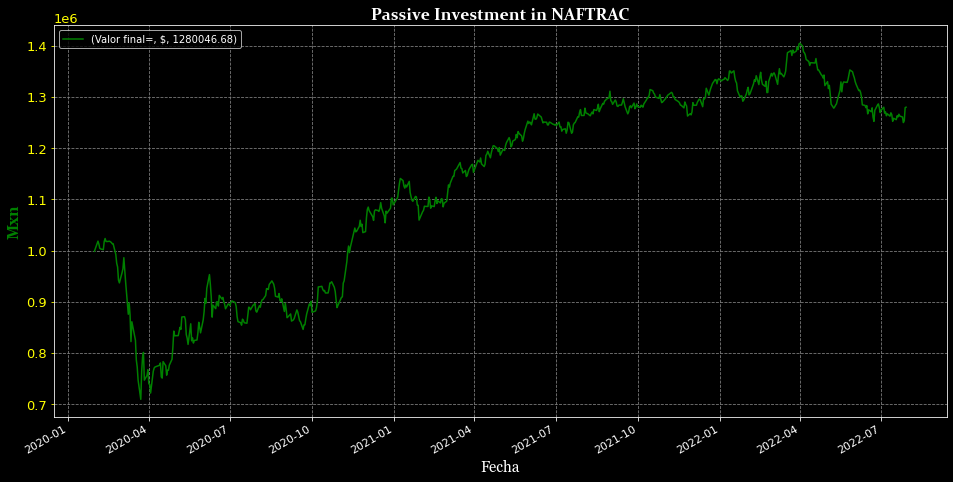

In [12]:
#### Comportamiento del Portafolio en el 2015
#Estética
plt.style.use('dark_background')
plt.rc('grid', linestyle="--", color='gray')
plt.rc('ytick', labelsize=13, color='yellow')
plt.rc('xtick', labelsize=11, color='white')

# Visualización
port_pas["Capital"].plot(figsize = (16,8),color='g',
         label=('Valor final=','$',port_pas['Capital'].iloc[-1].round(2)))
#Estética
plt.title("Passive Investment in NAFTRAC",size='17', weight='bold', family="Constantia")
plt.xlabel("Fecha",size='15', weight='roman', family="Georgia")
plt.ylabel("Mxn",size='15', weight='bold', family="Georgia", color='g')
plt.grid(True)
plt.legend(loc = "best")

Ticker selection from constant re appearance in CSVs.

In [13]:
pd.options.mode.chained_assignment = None
extension = 'csv' 
all_filenames = [i for i in glob.glob('*.{}'.format(extension))] #read all csvs in one line
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ]).dropna() #concatenate in a df
tick_rep  = Counter(combined_csv['Ticker']) #count occurences
tick_sorted = sorted(tick_rep.items(), key=lambda kv: kv[1]) #sort first values of tuple by occurence
print("ticker_list", str(tick_sorted)) #print all strings of tuples despite number of occurrence
ticker_selection = [i for i in tick_sorted if i[1] >= 31] #List compression to filter tickers by max n° of occurence
#ticker_selection[24] = ('LIVEPOLC-1','31') #Rename LIVEPOLC.1 to downloadable data
ticker_selection #results

ticker_list [('USD', 2), ('ALPEKA', 3), ('NMKA', 3), ('SITES1A-1', 5), ('BSMXB', 8), ('VOLARA', 11), ('GENTERA*', 14), ('IENOVA*', 16), ('SITESB.1', 18), ('RA', 25), ('GCC*', 26), ('VESTA*', 28), ('Q*', 28), ('AMXL', 31), ('FEMSAUBD', 31), ('GFNORTEO', 31), ('WALMEX*', 31), ('GMEXICOB', 31), ('CEMEXCPO', 31), ('TLEVISACPO', 31), ('GAPB', 31), ('ELEKTRA*', 31), ('ASURB', 31), ('KOFUBL', 31), ('KIMBERA', 31), ('BIMBOA', 31), ('OMAB', 31), ('AC*', 31), ('GFINBURO', 31), ('PINFRA*', 31), ('GRUMAB', 31), ('ORBIA*', 31), ('ALFAA', 31), ('GCARSOA1', 31), ('PE&OLES*', 31), ('ALSEA*', 31), ('BBAJIOO', 31), ('MEGACPO', 31), ('LIVEPOLC.1', 31), ('BOLSAA', 31), ('CUERVO*', 31), ('LABB', 31), ('MXN', 31)]


[('AMXL', 31),
 ('FEMSAUBD', 31),
 ('GFNORTEO', 31),
 ('WALMEX*', 31),
 ('GMEXICOB', 31),
 ('CEMEXCPO', 31),
 ('TLEVISACPO', 31),
 ('GAPB', 31),
 ('ELEKTRA*', 31),
 ('ASURB', 31),
 ('KOFUBL', 31),
 ('KIMBERA', 31),
 ('BIMBOA', 31),
 ('OMAB', 31),
 ('AC*', 31),
 ('GFINBURO', 31),
 ('PINFRA*', 31),
 ('GRUMAB', 31),
 ('ORBIA*', 31),
 ('ALFAA', 31),
 ('GCARSOA1', 31),
 ('PE&OLES*', 31),
 ('ALSEA*', 31),
 ('BBAJIOO', 31),
 ('MEGACPO', 31),
 ('LIVEPOLC.1', 31),
 ('BOLSAA', 31),
 ('CUERVO*', 31),
 ('LABB', 31),
 ('MXN', 31)]

From the first csv KOFUBL, IENOVA, GENTERA, GCC, BSMXB, RA and ALPEKA are removed for not consolidating NAFTRAC in all periods. Then our Active Investment (EMV) portfolio will have this tickers as options (weights will be ignored).

In [14]:
t2= pd.read_csv('NAFTRAC_20200131.csv')[['Ticker','Peso (%)']].drop(10).drop(16).drop(25).drop(31).drop(32).drop(33).drop(34).drop(35).drop(36)
W2=t['Peso (%)']/100 #1-W2.sum() Cash
t2.Ticker[27]='LIVEPOLC-1'
t2.head(32)

,Ticker,Peso (%)
0,AMXL,13.700000
1,FEMSAUBD,11.850000
2,GFNORTEO,10.640000
3,WALMEX*,10.390000
4,GMEXICOB,6.030000
5,CEMEXCPO,4.300000
6,TLEVISACPO,3.960000
7,GAPB,3.290000
8,ELEKTRA*,3.020000
9,ASURB,2.750000


In [15]:
tickers_ap=[stocks.replace('*','') for stocks in t2.Ticker + '.MX']
tickers_ap

['AMXL.MX',
 'FEMSAUBD.MX',
 'GFNORTEO.MX',
 'WALMEX.MX',
 'GMEXICOB.MX',
 'CEMEXCPO.MX',
 'TLEVISACPO.MX',
 'GAPB.MX',
 'ELEKTRA.MX',
 'ASURB.MX',
 'KIMBERA.MX',
 'BIMBOA.MX',
 'OMAB.MX',
 'AC.MX',
 'GFINBURO.MX',
 'PINFRA.MX',
 'GRUMAB.MX',
 'ORBIA.MX',
 'ALFAA.MX',
 'GCARSOA1.MX',
 'PE&OLES.MX',
 'ALSEA.MX',
 'BBAJIOO.MX',
 'MEGACPO.MX',
 'LIVEPOLC-1.MX',
 'BOLSAA.MX',
 'CUERVO.MX',
 'LABB.MX']

In [16]:
start = datetime.datetime(2020,1,31) #Portfolio conformation.
end = datetime.datetime(2021,1,31) #End of investment.
print('Download data and show summary of Active Investment Portfolio (EMV) from period', start.strftime("%Y-%m-%d"), 'to', end.strftime("%Y-%m-%d"))

Download data and show summary of Active Investment Portfolio (EMV) from period 2020-01-31 to 2021-01-31


In [17]:
#Daily Adj. closes df 
df = pdr.DataReader(tickers_ap, 'yahoo',start,end)["Adj Close"] #Adj. closes download
s0=df.head(1)
St=df.tail(1)


# Mean, Std, and Covariance from returns.
returns = df.pct_change().fillna(0) #NAs filled w/ 0s to preserve daily returns for all rows (days) in every column (ticker)

log_ret= np.log(1+returns)
mean_lr= log_ret.mean() * 252

mean_ret = returns.mean() * 252 #E(lr)
cov = returns.cov() * 252 #Covariance

#Summary
stocks_summary = pd.DataFrame({"Log_Return" : mean_lr, "Volatility" : log_ret.std()*np.sqrt(252)})
stocks_summary.head()

,Log_Return,Volatility
Symbols,,
AMXL.MX,-0.096127,0.332193
FEMSAUBD.MX,-0.175554,0.351773
GFNORTEO.MX,-0.134496,0.505107
WALMEX.MX,0.076514,0.292267
GMEXICOB.MX,0.619425,0.418507


In [18]:
# Treasury Yield Curve Rates 1Yr (2021-12-31) 
rf = 6.95 / (100)

# Datos necesarios para resolver los problemas de optimización
N = len(mean_lr)
w0 = np.ones(N) / N
bnds = ((0, None), ) * N
cons = {"type" : "eq", "fun" : lambda w : w.sum() - 1}

# Función a minimizar para encontrar el portafolio de mínima varianza
def Var(w, cov):
    return np.dot(w.T, np.dot(cov, w))

# Función a minimizar para encontrar el portafolio eficiente en media-varianza
def Minus_RatioSharpe(w, er, rf, cov):
    erp = np.dot(w.T, er)
    sp = np.dot(w.T, np.dot(cov, w))**0.5
    RS = (erp - rf) / sp
    return -RS

pmv = minimize(fun = Var, x0 = w0, args = (cov,), bounds = bnds, constraints = cons, tol = 1e-10)
pemv = minimize(fun = Minus_RatioSharpe, x0 = w0, args = (mean_lr, rf, cov), bounds = bnds, constraints = cons, tol = 1e-10)

In [23]:
#Ponderaciones del portafolio eficiente en media-varianza
w_pemv = pd.DataFrame(np.round(pemv.x.reshape(1, N), 4), columns = returns.columns, index = ["Ponderación"])
w_pemv[w_pemv <= 0.0] = np.nan
w_pemv.dropna(axis = 1, inplace = True)

In [27]:
s0_pemv=s0[['GMEXICOB.MX', 'CEMEXCPO.MX', 'PE&OLES.MX', 'CUERVO.MX']]
s0_pemv

Symbols,GMEXICOB.MX,CEMEXCPO.MX,PE&OLES.MX,CUERVO.MX
Date,,,,
2020-01-31,42.370079,7.595000,197.247894,33.807869


In [31]:
titles=((w_pemv*capital)/s0_pemv)
titles

Symbols,GMEXICOB.MX,CEMEXCPO.MX,PE&OLES.MX,CUERVO.MX
2020-01-31 00:00:00,NaN,NaN,NaN,NaN
Ponderación,NaN,NaN,NaN,NaN


In [25]:
s0_pemv=s0[['GMEXICOB.MX', 'CEMEXCPO.MX', 'PE&OLES.MX', 'CUERVO.MX']]
titles=(((w_pemv*capital)/s0_pemv).round(0))
I_V=((w_pemv*capital)/s0_pemv).round(0)*s0_pemv
titles.index= ['Títulos']
I_V.index= ['I_V']

pd.concat([w_pemv, titles, I_V])

ValueError: Length mismatch: Expected axis has 2 elements, new values have 1 elements

Symbols,GMEXICOB.MX,CEMEXCPO.MX,PE&OLES.MX,CUERVO.MX
Date,,,,
2020-01-31,42.370079,7.595000,197.247894,33.807869


In [ ]:
# Métricas del portafolio eficiente en media-varianza (anualizadas)
Er_pemv = np.dot(pemv.x.T, mean_lr)
s_pemv = (np.dot(pemv.x.T, np.dot(cov, pemv.x)))**0.5

pemv_summary = pd.DataFrame({"Rendimiento" : Er_pemv, "Volatilidad" : s_pemv,
                            "Ratio Sharpe" : (Er_pemv - rf) / s_pemv}, index = ["Portafolio EMV"])
pemv_summary

,Rendimiento,Volatilidad,Ratio Sharpe
Portafolio EMV,0.556439,0.364886,1.334498


C:\Users\Esteban\AppData\Local\Temp\ipykernel_39376\3094286725.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "*b" (-> color='b'). The keyword argument will take precedence.
  plt.plot(s_pmv, Er_pmv, "*b", ms=13, color = "dodgerblue",


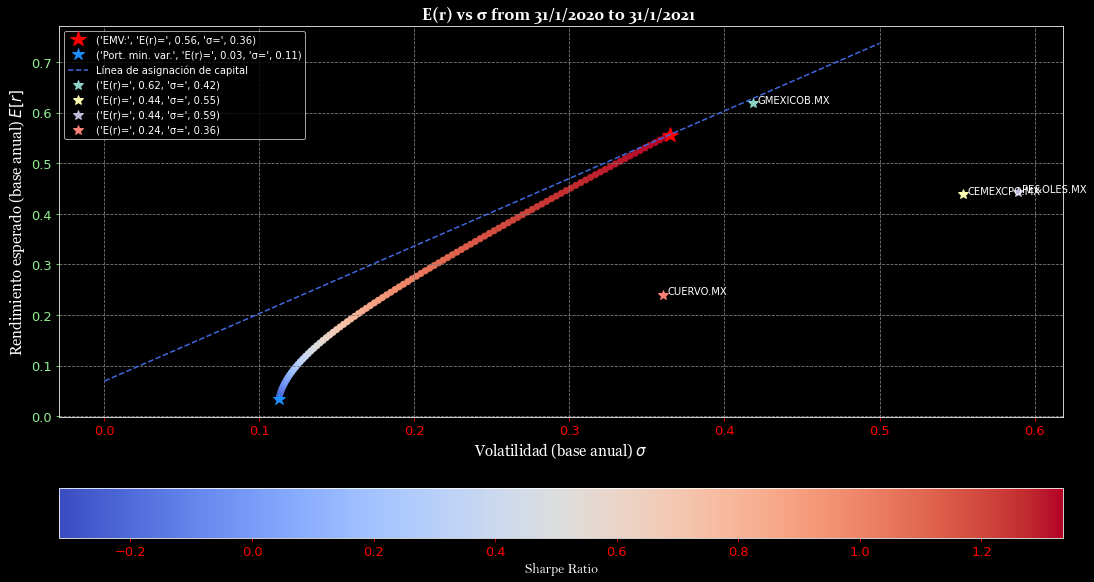

In [ ]:
## Gráfico
#Estética
plt.style.use('dark_background')
plt.rc('grid', linestyle="--", color='gray')
plt.rc('ytick', labelsize=13, color='lightgreen')
plt.rc('xtick', labelsize=13, color='red')

# Frontera de mínima varianza
w = np.linspace(0, 1, 100)
Er_pmv = np.dot(pmv.x, mean_ret)
s_pmv = (np.dot(pmv.x.T, np.dot(cov, pmv.x)))**0.5
cov_pmv_pemv = np.dot(pmv.x.T, np.dot(cov, pemv.x))
minvar_frontier = pd.DataFrame({"Volatilidad" : ((w*s_pemv)**2 + 2*w*(1-w)*cov_pmv_pemv + ((1-w)*s_pmv)**2)**0.5, 
                                "Rendimiento" : w*Er_pemv + (1 - w)*Er_pmv})
minvar_frontier["Ratio Sharpe"] = (minvar_frontier["Rendimiento"] - rf) / minvar_frontier["Volatilidad"]

# LAC (Línea de Asignación de Capital)
sp = np.linspace(0, 0.5)
lac = pd.DataFrame({"Volatilidad" : sp, "Rendimiento" : pemv_summary["Ratio Sharpe"].values[0]*sp + rf})

# Visualización
plt.figure(figsize = (18, 10))
# Portafolio eficiente en media-varianza
plt.plot(s_pemv, Er_pemv, "*r", ms=16, label = ("EMV:", 'E(r)=',Er_pemv.round(2),'σ=',s_pemv.round(2)))
# Portafolio de mínima varianza
plt.plot(s_pmv, Er_pmv, "*b", ms=13, color = "dodgerblue",
         label = ("Port. min. var.", 'E(r)=',Er_pmv.round(2),'σ=',s_pmv.round(2)))
# LAC
plt.plot(lac["Volatilidad"], lac["Rendimiento"], "--", color = "royalblue", label = "Línea de asignación de capital")
# Frontera de mínima varianza
plt.scatter(minvar_frontier["Volatilidad"], minvar_frontier["Rendimiento"],
            c = minvar_frontier["Ratio Sharpe"], cmap = "coolwarm")
plt.colorbar(orientation = "horizontal", pad=0.13).set_label(label='Sharpe Ratio',size='14', weight='roman', family="Bell MT")

# Activos individuales
for i in range(len(stocks_summary)):
    if stocks_summary.index[i] in w_pemv.columns:
        plt.plot(stocks_summary.iloc[i, 1], stocks_summary.iloc[i, 0], "*", ms=10, label=('E(r)=',
        stocks_summary.iloc[i, 0].round(2),'σ=',stocks_summary.iloc[i, 1].round(2)))

        plt.text(stocks_summary.iloc[i, 1] + 0.003, stocks_summary.iloc[i, 0], stocks_summary.index[i])
#Estética
plt.title("E(r) vs σ from 31/1/2020 to 31/1/2021 ",size='17', weight='bold', family="Constantia")
plt.xlabel("Volatilidad (base anual) $\sigma$",size='15', weight='roman', family="Georgia")
plt.ylabel("Rendimiento esperado (base anual) $E[r]$",size='15', weight='roman', family="Georgia")
plt.grid(True)
plt.legend(loc = "best")

In [ ]:
#Dates
start = datetime.datetime(2021,1,31) #Portfolio conformation.
end = datetime.datetime(2022,7,29) #Portfolio EMV maximization end date.

#Daily Adj. closes df 
df = pdr.DataReader(tickers, 'yahoo',start,end)["Adj Close"] #Adj. closes download
# Mean, Std, and Covariance from returns.
returns = df.pct_change().fillna(0) #NAs filled w/ 0s to preserve daily returns for all rows (days) in every column (ticker)
mean_ret = returns.mean() * 252 
cov = returns.cov() * 252
stocks_summary = pd.DataFrame({"Rendimiento" : mean_ret, "Volatilidad" : returns.std()*np.sqrt(252)})
stocks_summary



,Rendimiento,Volatilidad
Symbols,,
AMXL.MX,0.246945,0.227520
FEMSAUBD.MX,-0.033010,0.227044
GFNORTEO.MX,0.138703,0.361804
WALMEX.MX,0.149283,0.267889
GMEXICOB.MX,-0.017934,0.385077
CEMEXCPO.MX,-0.278956,0.397762
TLEVISACPO.MX,0.010353,0.392026
GAPB.MX,0.227818,0.296398
ELEKTRA.MX,-0.095825,0.175817


In [ ]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
a_cumsum=returns.iloc[returns.cumprod().reset_index().groupby(returns.index.to_period('M'))['Date'].idxmax()]+1
BS=a_cumsum.apply(lambda x: ['SELL' if y <= .95 else "BUY" if y>=1.05 else 'HOLD' if y > .95 and  y<1.05 else y for y in x])
BS = BS.style.applymap(lambda x: 'color: red' if x == 'SELL' else 'color: green' if x == 'BUY' else 'color: gray')
BS


Symbols,AMXL.MX,FEMSAUBD.MX,GFNORTEO.MX,WALMEX.MX,GMEXICOB.MX,CEMEXCPO.MX,TLEVISACPO.MX,GAPB.MX,ELEKTRA.MX,ASURB.MX,KIMBERA.MX,BIMBOA.MX,OMAB.MX,AC.MX,GFINBURO.MX,IENOVA.MX,PINFRA.MX,GRUMAB.MX,ORBIA.MX,ALFAA.MX,GCARSOA1.MX,PE&OLES.MX,ALSEA.MX,BBAJIOO.MX,GENTERA.MX,MEGACPO.MX,LIVEPOLC-1.MX,BOLSAA.MX,CUERVO.MX,LABB.MX,GCC.MX,RA.MX,ALPEKA.MX
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-26 00:00:00,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,BUY,HOLD,HOLD,HOLD,BUY,HOLD,HOLD,HOLD,BUY,HOLD,HOLD,HOLD,HOLD
2021-03-31 00:00:00,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,SELL,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD
2021-04-30 00:00:00,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD
2021-05-31 00:00:00,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD
2021-06-30 00:00:00,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD
2021-07-30 00:00:00,HOLD,HOLD,HOLD,HOLD,SELL,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD
2021-08-31 00:00:00,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,BUY,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,BUY,HOLD,HOLD,HOLD,HOLD
2021-09-30 00:00:00,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,BUY,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD
2021-10-29 00:00:00,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,BUY,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,SELL,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD,HOLD


## Results: Metrics & Methods
 Rebalance using  Markowitz EMV and calculating Sharpe Ratio and monthly return and accumulated.
 Comparative dataframes and graphs creation (include excess return graph)

## Period 1:
1. Pre-pandemic: 01-31-2018 to 01-31-2020
2. In pandemic: 2020-01-31 to 2022-07-29


### Answers section.

¿What is the difference between investment (Active)?

- Advantage:

  The opportunity to obtain excess returns.

  Flexibility.

  Admin. of risks.

- Disadvantages:

  Performance depends on analysts.

  Higher costs. 

  Higher risk.

¿What is the difference between investment (Passive)?

- Advantage:

  Improbability of returns below the index (ETF).

  Low admin costs.

  Quick access to the market.

- Disadvantages:

  Hidden commission costs.

  The reallocation of assets (or rebalancing) by the fund cannot be passive.

  There is no possibility of having a greater return to the market.

  Lack of flexibility.

  Lack of liquidity.

¿What is the difference between investing only by replicating an index and investing by rebalancing a portfolio based on a specific rule (Sharpe and Sortino algorithm)?

- Notes:

  The section of answers and interpretation of results by cell, is the MOST IMPORTANT.

  Template project structure with python.

  Use the yfinance api (https://pypi.org/project/yfinance/).
  
  Work with the structure of Python Projects.